# Análise da Taxa Selic No Decorrer dos Anos

In [14]:
# Import Python packages
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'data/selic_daily_bcdata.sgs.1178.csv'
df = pd.read_csv(file_path, parse_dates=['data'], sep=";")

/tmp/ipykernel_21897/1227940353.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['data'], sep=";")


In [15]:
# Convert the 'valor' column to numeric with comma as decimal separator
df['valor'] = pd.to_numeric(df['valor'].str.replace(',', '.'), errors='coerce')

# Extract the month and year from the 'data' column
df['month_year'] = df['data'].dt.to_period('M')

# Calculate the average of the 'valor' column grouped by 'month_year'
average_by_month = df.groupby('month_year')['valor'].mean()


In [16]:
# Calculate centrality metrics for the 'valor' column in average_by_month DataFrame
centrality_metrics = average_by_month.describe()

# Calculate mode separately
mode_value = average_by_month.mode().iloc[0]

# Add mode to centrality_metrics DataFrame
centrality_metrics['mode'] = mode_value

In [17]:
print(centrality_metrics)

count    332.000000
mean      14.120937
std        7.295691
min        1.900000
25%        9.386429
50%       13.150000
75%       18.259989
max       45.902000
mode       6.400000
Name: valor, dtype: float64


In [18]:
# Filter the last 36 records and order by 'month_year' in descending order
filtered_last_36 = average_by_month.tail(36).sort_index(ascending=False)


In [19]:
# Calculate centrality metrics for the 'valor' column in average_by_month DataFrame
centrality_metrics_last_36 = filtered_last_36.describe()

# Calculate mode separately
mode_value_last_36 = filtered_last_36.mode().iloc[0]

# Add mode to centrality_metrics DataFrame
centrality_metrics_last_36['mode'] = mode_value_last_36

In [20]:
print(centrality_metrics_last_36)

count    36.000000
mean     10.288368
std       4.097853
min       1.900000
25%       7.312500
50%      12.344318
75%      13.650000
max      13.650000
mode     13.650000
Name: valor, dtype: float64


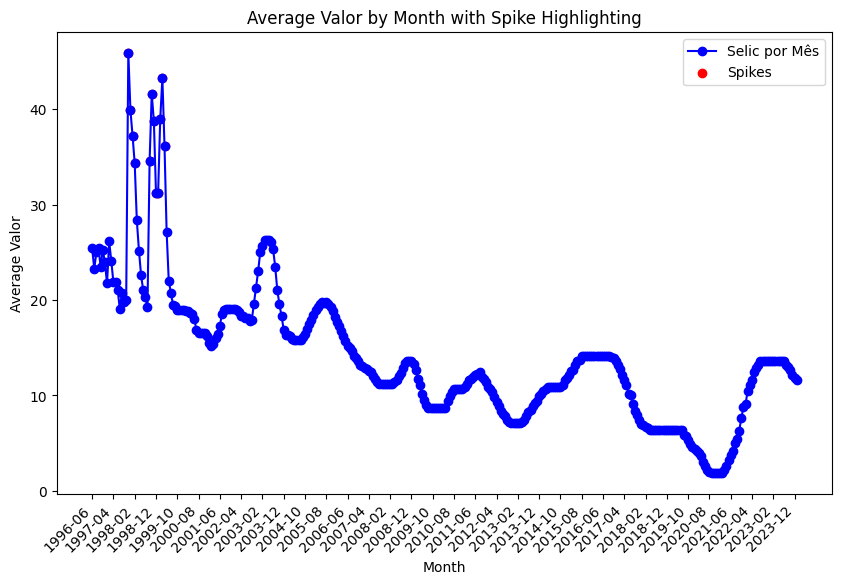

In [37]:
# Define a threshold for highlighting spikes
spike_threshold = 30.0

# Convert the series to a DataFrame
average_df = average_by_month.reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(average_df.index, average_df['valor'], label='Selic por Mês', marker='o', linestyle='-', color='b')

# Highlight spikes above the threshold
spikes = average_df[average_df['valor'] > spike_threshold]
plt.scatter(spikes.index, spikes.valor, color='r', label='Spikes')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Valor')
plt.title('Average Valor by Month with Spike Highlighting')
plt.legend()

# Set custom labels for X-axis based on 'month_year'
plt.xticks(average_df.index, average_df['month_year'].astype(str), rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.IndexLocator(base=10, offset=0))

# Show the plot
plt.show()

In [35]:
spikes

,month_year,valor
17,1997-11,45.902000
18,1997-12,39.869545
19,1998-01,37.193810
20,1998-02,34.318333
27,1998-09,34.557143
28,1998-10,41.598571
29,1998-11,38.767500
30,1998-12,31.254091
31,1999-01,31.210000
32,1999-02,38.974444
